In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# --- STEP 1: LOAD & CLEAN DATA ---

df = pd.read_csv('churn_data.csv') 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) 

df = df.drop('customerID', axis=1)

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("Data Cleaned Successfully!")

Data Cleaned Successfully!


In [4]:
# --- STEP 2: SPLIT DATA ---

X = df.drop('Churn', axis=1) 
y = df['Churn']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# --- STEP 3: TRAIN MODEL (XGBoost) ---

print("Training XGBoost Model...")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

Training XGBoost Model...


c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:37:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [7]:
# --- STEP 4: EVALUATE MODEL ---

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")


Model Accuracy: 76.40%


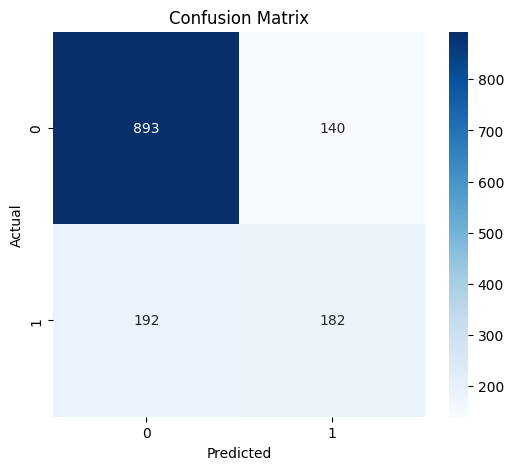

In [8]:
# Visualization 1: Confusion Matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
plt.show()

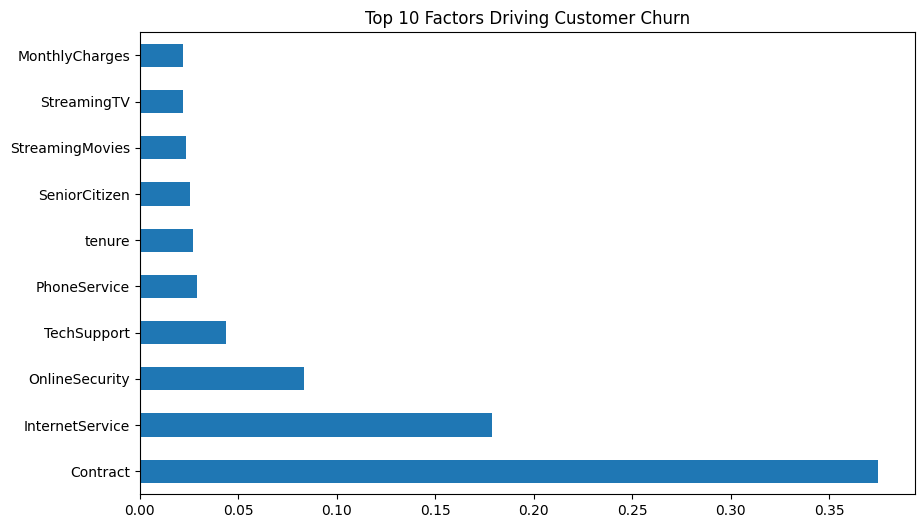

In [9]:
# Visualization 2: Feature Importance

plt.figure(figsize=(10,6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Factors Driving Customer Churn')
plt.savefig('feature_importance.png')
plt.show()

In [10]:
# --- STEP 5: SAVE RESULTS FOR DASHBOARD ---

results = X_test.copy()
results['Actual Churn'] = y_test
results['Predicted Churn'] = y_pred
results['Churn Probability'] = model.predict_proba(X_test)[:, 1] 

results.to_csv('churn_predictions.csv', index=False)
print("Success! Results saved to 'churn_predictions.csv'")

Success! Results saved to 'churn_predictions.csv'
